In [2]:
import pandas as pd
import numpy as np
from tqdm import tqdm, tqdm_notebook
tqdm.pandas()

In [3]:
df1 = pd.read_csv('spam.csv')
df1

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [4]:
df2 = pd.read_csv('spam_ham_dataset.csv')
df2

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0
...,...,...,...,...
5166,1518,ham,Subject: put the 10 on the ft\r\nthe transport...,0
5167,404,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...,0
5168,2933,ham,Subject: calpine daily gas nomination\r\n>\r\n...,0
5169,1409,ham,Subject: industrial worksheets for august 2000...,0


In [5]:
data_original = pd.concat([df1,df2[['label','text']].rename(columns={'label':'Category','text':'Message'})], ignore_index=True, axis=0)
data_original

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
10738,ham,Subject: put the 10 on the ft\r\nthe transport...
10739,ham,Subject: 3 / 4 / 2000 and following noms\r\nhp...
10740,ham,Subject: calpine daily gas nomination\r\n>\r\n...
10741,ham,Subject: industrial worksheets for august 2000...


In [6]:
data_original.sample(5)

,Category,Message
1983,ham,Hey i will be late... i'm at amk. Need to drin...
3898,ham,No. Thank you. You've been wonderful
924,ham,She went to attend another two rounds today..b...
5292,spam,Urgent! Please call 09061213237 from landline....
9178,ham,Subject: panenergy marketing march 2000 produc...


In [7]:
data = data_original.copy()
data.sample(6)

,Category,Message
3808,ham,Pls dont restrict her from eating anythin she ...
8188,ham,Subject: industrial accounts\r\nas of january ...
6048,spam,"Subject: attract the opposite sex , the ultima..."
10324,spam,"Subject: lose 19 % , powerful weightloss now a..."
9294,ham,"Subject: enron / hpl actuals for june 6 , 2000..."
9306,ham,Subject: same day change - revision # 1 - hpl ...


### EDA and Data Preprocessig

In [8]:
import matplotlib.pyplot as plt
from collections import Counter
import seaborn as sns

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10743 entries, 0 to 10742
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  10743 non-null  object
 1   Message   10743 non-null  object
dtypes: object(2)
memory usage: 168.0+ KB


In [10]:
# To check Dupicate doc from our corpus
duplicate_docs = data[ data.duplicated() == True]
duplicate_docs

,Category,Message
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...
207,ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,ham,"Sorry, I'll call later"
326,ham,No calls..messages..missed calls
...,...,...
10633,ham,Subject: tenaska iv\r\nbob :\r\ni understand f...
10636,spam,Subject: \r\nthis week only : f . ree gen . er...
10661,spam,Subject: \r\nthe permanent fix to penis growth...
10727,ham,Subject: cleburne - tenaska iv plant\r\ndaren ...


Total No. Docs: 10743
Total No. Duplicate Docs: 593
Total length of unique Docs are:10150


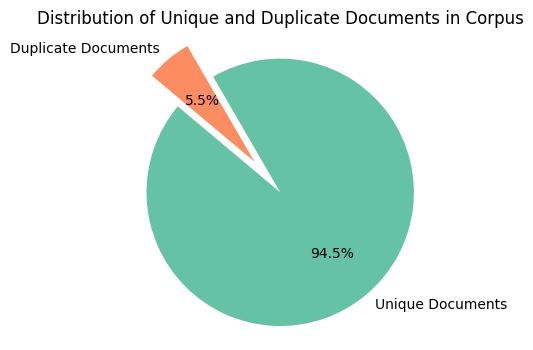

In [11]:
Total_doc_length = data.shape[0]
duplicate_doc_length =  duplicate_docs.shape[0]
print(f'Total No. Docs: {Total_doc_length}\nTotal No. Duplicate Docs: {duplicate_doc_length}')

# Extracting length of unique docs
unique_doc = Total_doc_length - duplicate_doc_length
print(f"Total length of unique Docs are:{unique_doc}")
# Create the pie chart
sizes = [unique_doc, duplicate_doc_length]
colors = ['#66c2a5', '#fc8d62'] 
plt.figure(figsize=(5,4))
plt.pie(sizes,explode = (0.3, 0), labels=['Unique Documents', 'Duplicate Documents'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is a circle.
plt.title("Distribution of Unique and Duplicate Documents in Corpus")
plt.show()

As we can see from the above data , there are `593` docs which is about `5.5%` duplicate docs in our corpus which is very low in coparions total legth of the Corpus, So we can remove it.

In [12]:
# this code will remove duplicate docs and keeps the last occurence only
data = data.drop_duplicates(keep='last')
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...


In [13]:
data.duplicated().sum()

0

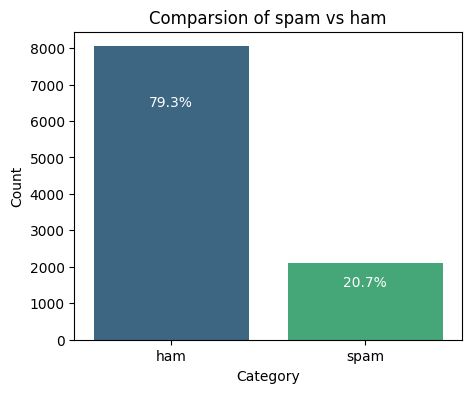

In [14]:
# create the bar plot
plt.figure(figsize=(5,4))
ax = sns.barplot(x='Category', y='Count', 
            data=data.value_counts('Category').reset_index(name='Count'), 
            palette='viridis', 
            hue='Category')
# Add percentage labels on top of the bars
for p in ax.patches:
    percentage = f'{(p.get_height() / len(data)) * 100:.1f}%'  # Calculate percentage
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()/1.2), 
                ha='center', va='top', color = 'white')

# Show the plot
plt.title('Comparsion of spam vs ham')
plt.xlabel('Category')
plt.show()

From the above observation:<br> `79%` of docs from our corpus is `ham` while approx `21%` docs are `spam` 

In [15]:
import nltk

In [16]:
data['Total_Char'] = data['Message'].progress_apply(len)
data.sample(5)

100%|██████████| 10150/10150 [00:00<00:00, 281817.42it/s]


,Category,Message,Total_Char
4044,ham,I am literally in bed and have been up for lik...,65
10027,ham,Subject: south hampton refining\r\ni have adde...,381
7118,spam,Subject: hot slutty porn stars can make you mo...,1808
2376,ham,Thanx 4 2day! U r a goodmate I THINK UR RITE S...,95
4720,ham,Aiyo... Her lesson so early... I'm still sleep...,102


In [17]:
from nltk.tokenize import word_tokenize

In [18]:
data['Total_Words'] = data['Message'].progress_apply(lambda doc:len(word_tokenize(doc)))
data.sample(6)

100%|██████████| 10150/10150 [00:17<00:00, 564.48it/s]


,Category,Message,Total_Char,Total_Words
6645,spam,Subject: solid new homes in 24 hours .\r\nhows...,416,85
4489,ham,Call me when you get the chance plz &lt;3,41,12
916,ham,I could ask carlos if we could get more if any...,67,15
1858,ham,I hate when she does this. She turns what shou...,135,29
4863,spam,**FREE MESSAGE**Thanks for using the Auction S...,159,30
360,ham,"Hello! Just got here, st andrews-boy its a lon...",85,21


In [19]:
from nltk.tokenize import sent_tokenize

In [20]:
data['Total_Sentences'] = data['Message'].progress_apply(lambda doc:len(sent_tokenize(doc)))
data.sample(6)

100%|██████████| 10150/10150 [00:03<00:00, 2714.74it/s]


,Category,Message,Total_Char,Total_Words,Total_Sentences
3908,ham,No that just means you have a fat head,38,9,1
3493,ham,I will reach office around &lt;DECIMAL&gt; . ...,126,35,4
237,ham,Or ill be a little closer like at the bus stop...,65,15,1
3626,ham,I want to tel u one thing u should not mistake...,87,22,1
5629,ham,Subject: enron / hpl actuals for september 22 ...,401,100,10
9079,ham,Subject: fw : calpine daily gas nomination\r\n...,526,132,8


In [21]:
data[['Total_Char', 'Total_Words', 'Total_Sentences']].describe()

,Total_Char,Total_Words,Total_Sentences
count,10150.000000,10150.000000,10150.000000
mean,566.264532,124.381379,7.586108
std,1193.876520,262.209820,20.449545
min,2.000000,1.000000,1.000000
25%,56.000000,14.000000,1.000000
50%,143.000000,31.000000,3.000000
75%,541.000000,123.000000,7.000000
max,32258.000000,8863.000000,1204.000000


#### Key Insights
1. Document Length:  
&emsp;&emsp;&emsp;The average document is `566` characters long, but with a high standard deviation of `1,194`, indicating significant variability. The median length is `143` characters, suggesting many short documents.

2. Word Count:  
&emsp;&emsp;&emsp;On average, documents contain `124` words, with a standard deviation of `262` words. The median is `31` words, highlighting a tendency towards concise entries, but some documents are much longer.

3. Sentence Count:  
&emsp;&emsp;&emsp;Documents average `7.6` sentences, but the median is only `3`, indicating many are quite short. The maximum is `1,204` sentences, pointing to some lengthy texts.

4. Distribution:  
&emsp;&emsp;&emsp;Minimum values are low (e.g., 2 characters and 1 word), suggesting very short entries. The `75th percentile` indicates that `75%` of documents have fewer than `541` characters and `123` words.

In [22]:
print('A descriptive look of ham Corpus -')
data[data['Category']=='ham'][['Total_Char', 'Total_Words', 'Total_Sentences']].describe()

A descriptive look of ham Corpus -


,Total_Char,Total_Words,Total_Sentences
count,8047.000000,8047.000000,8047.000000
mean,476.348577,110.840437,6.143159
std,1037.034068,247.254504,17.504401
min,2.000000,1.000000,1.000000
25%,47.000000,12.000000,1.000000
50%,107.000000,26.000000,3.000000
75%,433.500000,104.000000,6.000000
max,32258.000000,8863.000000,1204.000000


In [23]:
print('A descriptive look of spam Corpus -')
data[data['Category']=='spam'][['Total_Char', 'Total_Words', 'Total_Sentences']].describe()

A descriptive look of spam Corpus -


,Total_Char,Total_Words,Total_Sentences
count,2103.000000,2103.000000,2103.000000
mean,910.322397,176.194960,13.107466
std,1617.400098,307.511757,28.421489
min,7.000000,2.000000,1.000000
25%,149.500000,29.000000,3.000000
50%,336.000000,67.000000,5.000000
75%,875.500000,174.500000,13.000000
max,22073.000000,3963.000000,693.000000


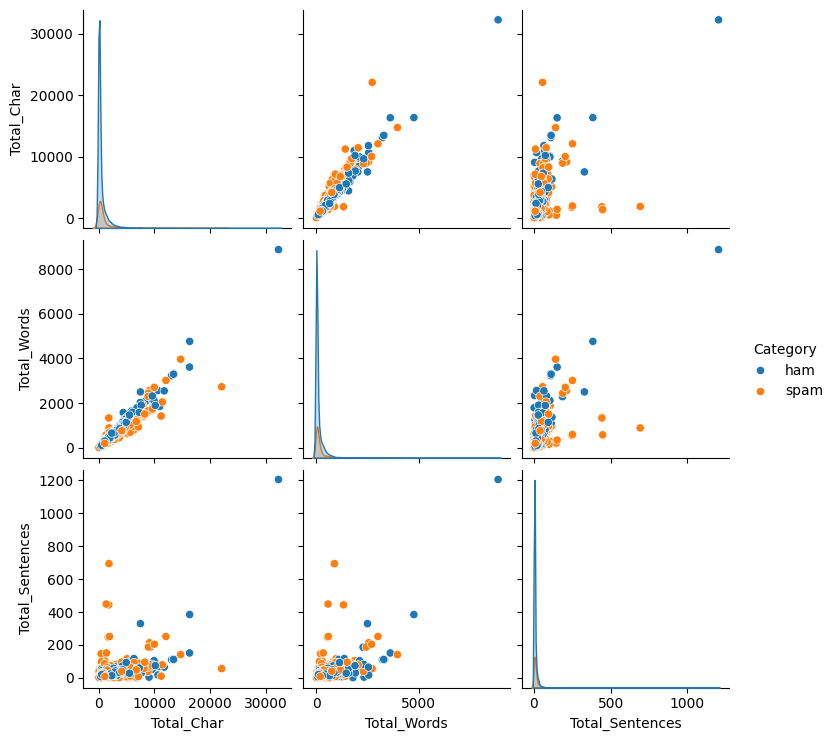

In [24]:
sns.pairplot(data,hue='Category')

In [25]:
import re

from nltk.corpus import stopwords
from nltk.stem. porter import PorterStemmer
from nltk.stem import WordNetLemmatizer


In [26]:
## initialise the inbuilt Stemmer
stemmer = PorterStemmer()

## We can also use Lemmatizer instead of Stemmer
lemmatizer = WordNetLemmatizer()

In [27]:
def preprocess(text, flag):

    text = re.sub(r'\bSubject\b', '', text, flags=re.IGNORECASE)

    # replacing urls with empty str
    text = re.sub(r'www.\S+|https?://\S+', ' ', text) 

    # Removing special characters and digits
    text = re.sub("[^a-zA-Z]", " ", text)

    # Remove extra spaces (optional)
    text = re.sub(r'\s+', ' ', text).strip()
    
    # change sentence to Lower case
    text = text.lower()
    
    # tokenize into words
    tokens = text.split()
    
    # remove stop words
    #clean_tokens = [token for token in tokens if not token in stopwords.words("english")]
    
    # Stemming/Lemmatization
    if(flag == 'stem'):
        clean_tokens = [stemmer.stem(token) for token in tokens if not token in stopwords.words("english")]
    elif(flag == 'lemma'):
        clean_tokens = [lemmatizer.lemmatize(token) for token in tokens if not token in stopwords.words("english")]
    return pd.Series([" ".join(clean_tokens), len(clean_tokens)])

### Preprocessing with Stemming

In [28]:
data[['Stemed_Clean_Data','Stemed_Word_Length']] = data['Message'].progress_apply(lambda x: pd.Series(preprocess(x, 'stem')))
#data

100%|██████████| 10150/10150 [06:40<00:00, 25.37it/s]


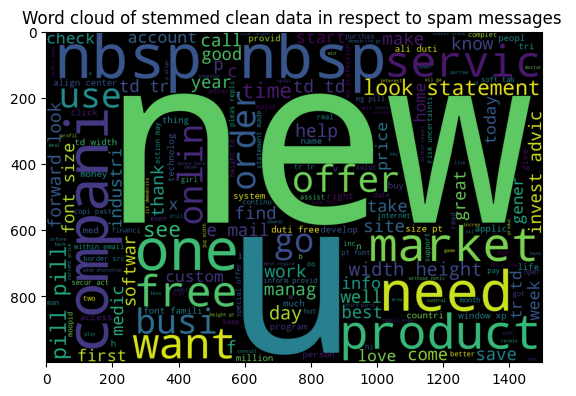

In [29]:
from wordcloud import WordCloud
WC = WordCloud (width=1500,height=1000,min_font_size=10, background_color='black')
stemmed_spam_wc = WC.generate(data[data['Category']=='spam']['Stemed_Clean_Data'].str.cat(sep=' '))
plt.title('Word cloud of stemmed clean data in respect to spam messages ')
plt.imshow(stemmed_spam_wc)


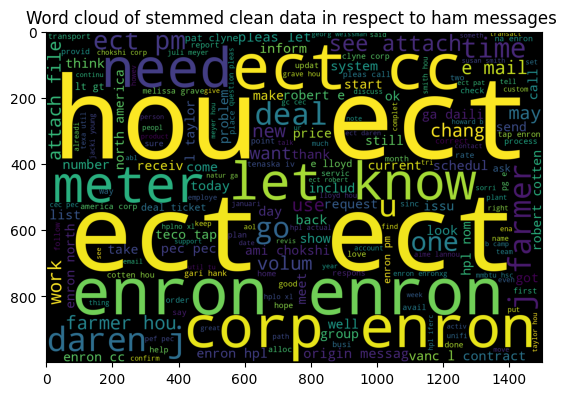

In [30]:
WC = WordCloud (width=1500,height=1000,min_font_size=10, background_color='black')
stemmed_ham_wc = WC.generate(data[data['Category']=='ham']['Stemed_Clean_Data'].str.cat(sep=' '))
plt.title('Word cloud of stemmed clean data in respect to ham messages ')
plt.imshow(stemmed_ham_wc)

### Preprocessing with Lematization

In [31]:
data[['Lematized_Clean_Data','Lematized_Clean_Data_Length']] = data['Message'].progress_apply(lambda x: pd.Series(preprocess(x, 'lemma')))
data.head()

100%|██████████| 10150/10150 [06:29<00:00, 26.07it/s]


,Category,Message,Total_Char,Total_Words,Total_Sentences,Stemed_Clean_Data,Stemed_Word_Length,Lematized_Clean_Data,Lematized_Clean_Data_Length
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,16,go jurong point crazy available bugis n great ...,16
1,ham,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,6,ok lar joking wif u oni,6
3,ham,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,9,u dun say early hor u c already say,9
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,7,nah think go usf life around though,7
5,spam,FreeMsg Hey there darling it's been 3 week's n...,147,39,4,freemsg hey darl week word back like fun still...,16,freemsg hey darling week word back like fun st...,16


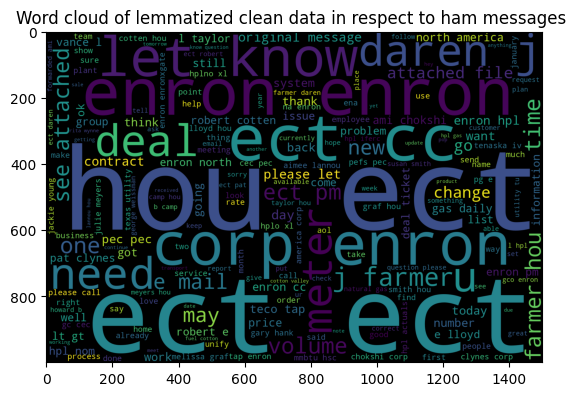

In [32]:
WC = WordCloud (width=1500,height=1000,min_font_size=10, background_color='black')
lemmatized_ham_wc = WC.generate(data[data['Category']=='ham']['Lematized_Clean_Data'].str.cat(sep=' '))
plt.title('Word cloud of lemmatized clean data in respect to ham messages ')
plt.imshow(lemmatized_ham_wc)

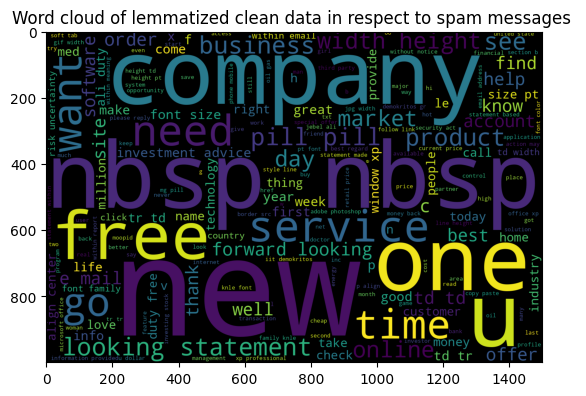

In [33]:
WC = WordCloud (width=1500,height=1000,min_font_size=10, background_color='black')
lemmatized_spam_wc = WC.generate(data[data['Category']=='spam']['Lematized_Clean_Data'].str.cat(sep=' '))
plt.title('Word cloud of lemmatized clean data in respect to spam messages ')
plt.imshow(lemmatized_spam_wc)

In [34]:
data['Category'] = data['Category'].progress_apply(lambda doc: 0 if doc == 'spam' else 1)


100%|██████████| 10150/10150 [00:00<00:00, 475581.86it/s]


In [35]:
data.sample(3)

,Category,Message,Total_Char,Total_Words,Total_Sentences,Stemed_Clean_Data,Stemed_Word_Length,Lematized_Clean_Data,Lematized_Clean_Data_Length
9589,1,Subject: resumes - accounting\r\nplease let me...,420,86,8,resum account pleas let know interest intervie...,39,resume accounting please let know interested i...,39
9110,1,"Subject: fw : tufco deal 108058\r\ndarin ,\r\n...",1046,232,11,fw tufco deal darin sinc volum ena deal pgev e...,88,fw tufco deal darin since volume ena deal pgev...,88
9953,1,Subject: txu noms . for 10 / 14 - 16 / 00\r\na...,210,49,5,txu nom attach pleas find txu nomin weekend oc...,18,txu noms attached please find txu nomination w...,18


In [36]:

spam_corpus = []
for doc in tqdm(data[data['Category']==0]['Lematized_Clean_Data']):
    for word in doc.split():
        spam_corpus.append(word)


ham_corpus = []
for doc in tqdm(data[data['Category']==1]['Lematized_Clean_Data']):
    for word in doc.split():
        ham_corpus.append(word)


100%|██████████| 8047/8047 [00:00<00:00, 129453.23it/s]


In [37]:
from collections import Counter


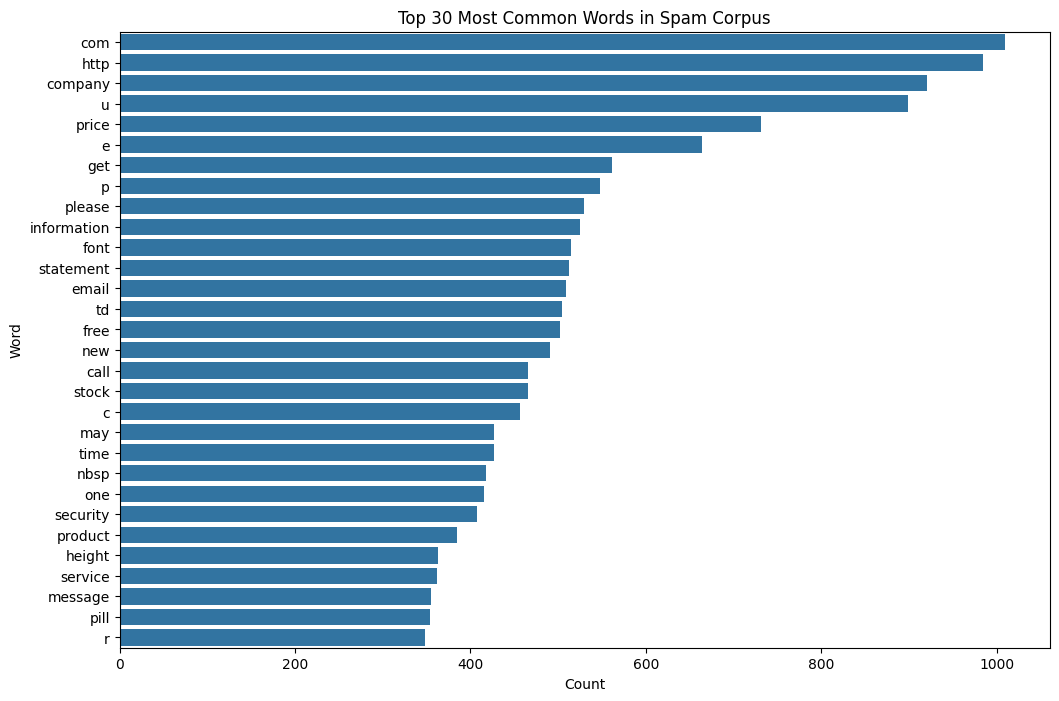

In [38]:
most_common_words = Counter(spam_corpus).most_common(30)

# Create a DataFrame from the most common words
df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=df)
plt.title('Top 30 Most Common Words in Spam Corpus')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

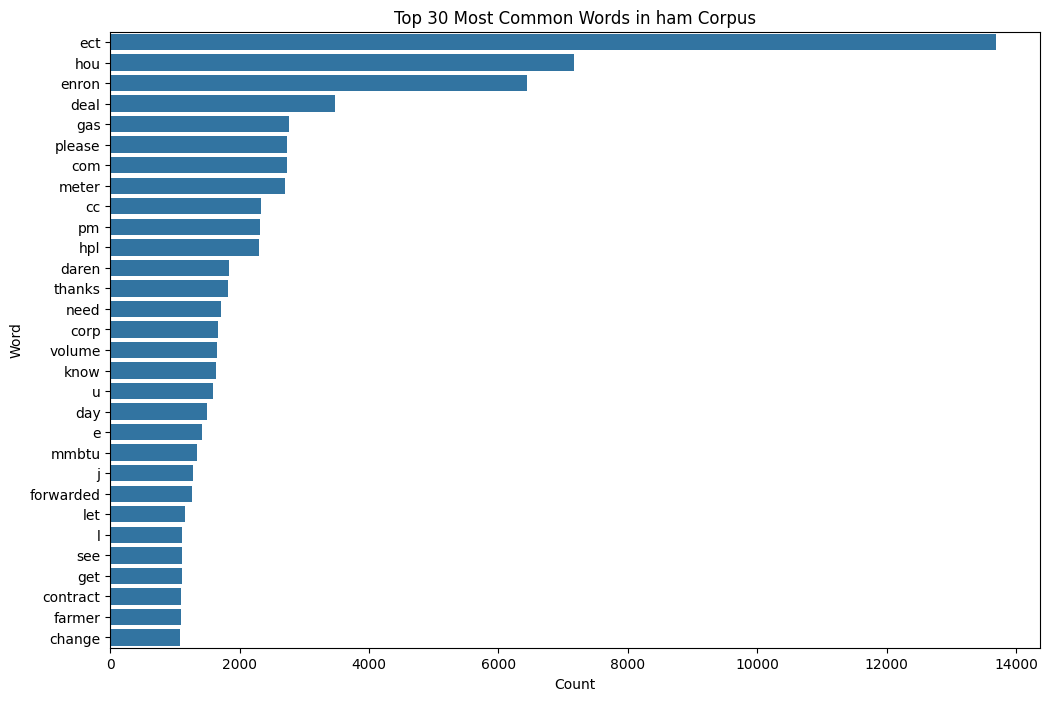

In [39]:
most_common_words = Counter(ham_corpus).most_common(30)

# Create a DataFrame from the most common words
df = pd.DataFrame(most_common_words, columns=['Word', 'Count'])

# Create a bar plot
plt.figure(figsize=(12, 8))
sns.barplot(x='Count', y='Word', data=df)
plt.title('Top 30 Most Common Words in ham Corpus')
plt.xlabel('Count')
plt.ylabel('Word')
plt.show()

(0.0, 1.0, 0.0, 1.0)

# Model Building

### 1. Vectorizing Corpus: Bag-Of-Words

As we all know that machine can understand only numeric language to do any task , and our `data(Corpus)` is in `text format` , we have to `convert our data` into `numerical format` , so that our machine can understand it and performed our desired task , and this process is known as `Text Vectorization`

In [58]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

Data splitation into `input var` i.e. `X` and `output var` i.e. `y`

In [59]:
# Storing our inputs into X var
X = cv.fit_transform(data['Lematized_Clean_Data']).toarray() # toarray is used to convert sparse
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [60]:
y = data['Category'].values
y

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [61]:
X.shape

(10150, 45921)

In [62]:
from sklearn.model_selection import train_test_split

In [63]:
X_train, X_test, y_train, y_test = tqdm(train_test_split(X,y, test_size=.2, random_state=47))


100%|██████████| 4/4 [00:00<00:00, 1395.43it/s]


In [64]:
# importing models
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

# importing Metrics for see the models score
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

### Just a small function to show any dataframe with Title

In [170]:
# Empty dictionary to store model and score
#model_and_metric_score_dict = {}

def model_performance(models_dictionary,metrics_dictionary):
    '''
    To use this function we have provide dictionary of model_name with model
    for example models={
    'Linear Regression': LinearRegression
    }
    '''
    model_and_metric_score_dict = {}
    
    for model_name, model_func in models_dictionary.items():
        model = model_func()
        print(f'{model_name} is gettieg traied...')
        model.fit(X_train,y_train)
        print(f'{model_name} is trained')
    
    # Prediction of model
        print(f'{model_name} is being testing')
        y_pred = model.predict(X_test)
        print(f'{model_name}  tested')

    # Empty dictionary for metrics to store their score
        metricses_score = {}

        for metric_name, metric_func in metrics_dictionary.items():

            print(f'getting score of {metric_name} metric by {model_name}')
            score = metric_func(y_pred, y_test)
            if isinstance(score, np.ndarray):
                metricses_score.update({metric_name:score})
            else:
                # storing metrics score
                metricses_score.update({metric_name:round(score,2)})
    
        # Storing model name and metrics
        model_and_metric_score_dict.update({model_name:metricses_score})
        print('-'*45)
    return model_and_metric_score_dict
        


In [159]:
# Creati dictionaries of model and metrics to store the model with their scores
Naive_Bayes_Models = {
    'GaussianNB': GaussianNB,
    'MultinomialNB': MultinomialNB,
    'BernoulliNB':BernoulliNB  
}

metrics = {
    'Accuracy': accuracy_score,
    'Precision': precision_score,
    'confusion_matrix':confusion_matrix  
}

In [174]:
model_performance = model_performance(Naive_Bayes_Models,metrics)
model_performance

GaussianNB is gettieg traied...
GaussianNB is trained
GaussianNB is being testing
GaussianNB  tested
getting score of Accuracy metric by GaussianNB
getting score of Precision metric by GaussianNB
getting score of confusion_matrix metric by GaussianNB
---------------------------------------------
MultinomialNB is gettieg traied...
MultinomialNB is trained
MultinomialNB is being testing
MultinomialNB  tested
getting score of Accuracy metric by MultinomialNB
getting score of Precision metric by MultinomialNB
getting score of confusion_matrix metric by MultinomialNB
---------------------------------------------
BernoulliNB is gettieg traied...
BernoulliNB is trained
BernoulliNB is being testing
BernoulliNB  tested
getting score of Accuracy metric by BernoulliNB
getting score of Precision metric by BernoulliNB
getting score of confusion_matrix metric by BernoulliNB
---------------------------------------------


{'GaussianNB': {'Accuracy': 0.93,
  'Precision': 0.95,
  'confusion_matrix': array([[ 337,   73],
         [  75, 1545]], dtype=int64)},
 'MultinomialNB': {'Accuracy': 0.95,
  'Precision': 0.95,
  'confusion_matrix': array([[ 389,   75],
         [  23, 1543]], dtype=int64)},
 'BernoulliNB': {'Accuracy': 0.87,
  'Precision': 0.98,
  'confusion_matrix': array([[ 178,   25],
         [ 234, 1593]], dtype=int64)}}

In [185]:
NB_Models_Score = pd.DataFrame.from_dict(model_performance).reset_index(drop=False, names='Metrics')
NB_Models_Score

,Metrics,GaussianNB,MultinomialNB,BernoulliNB
0,Accuracy,0.93,0.95,0.87
1,Precision,0.95,0.95,0.98
2,confusion_matrix,"[[337, 73], [75, 1545]]","[[389, 75], [23, 1543]]","[[178, 25], [234, 1593]]"


In [140]:
def plot_dataframe_title(df, Title, figure_size=None):
    if figure_size == None:
        raise Exception("figure size not provided")
    else:
        fig = plt.figure(figsize=tuple(figure_size))
        ax = fig.add_subplot(111)
    
    # Create table
    table  = ax.table(cellText=df.values, rowLabels=df.index, 
             colLabels=df.columns, cellLoc='center', loc='upper center')
    
    # Increase cell size
    for key, cell in table.get_celld().items():
        cell.set_fontsize(30)  # Increase font size
        cell.set_height(.5)   # Set height for each cell
        cell.set_width(2)
    
    # Add title to table
    ax.set_title(Title, 
                 fontdict={'fontsize': 35,
                           'fontweight': 'bold',
                           'color': 'steelblue'},
                 loc='center')
    
    # Turn axes off
    ax.axis('off')

    #plt.show()

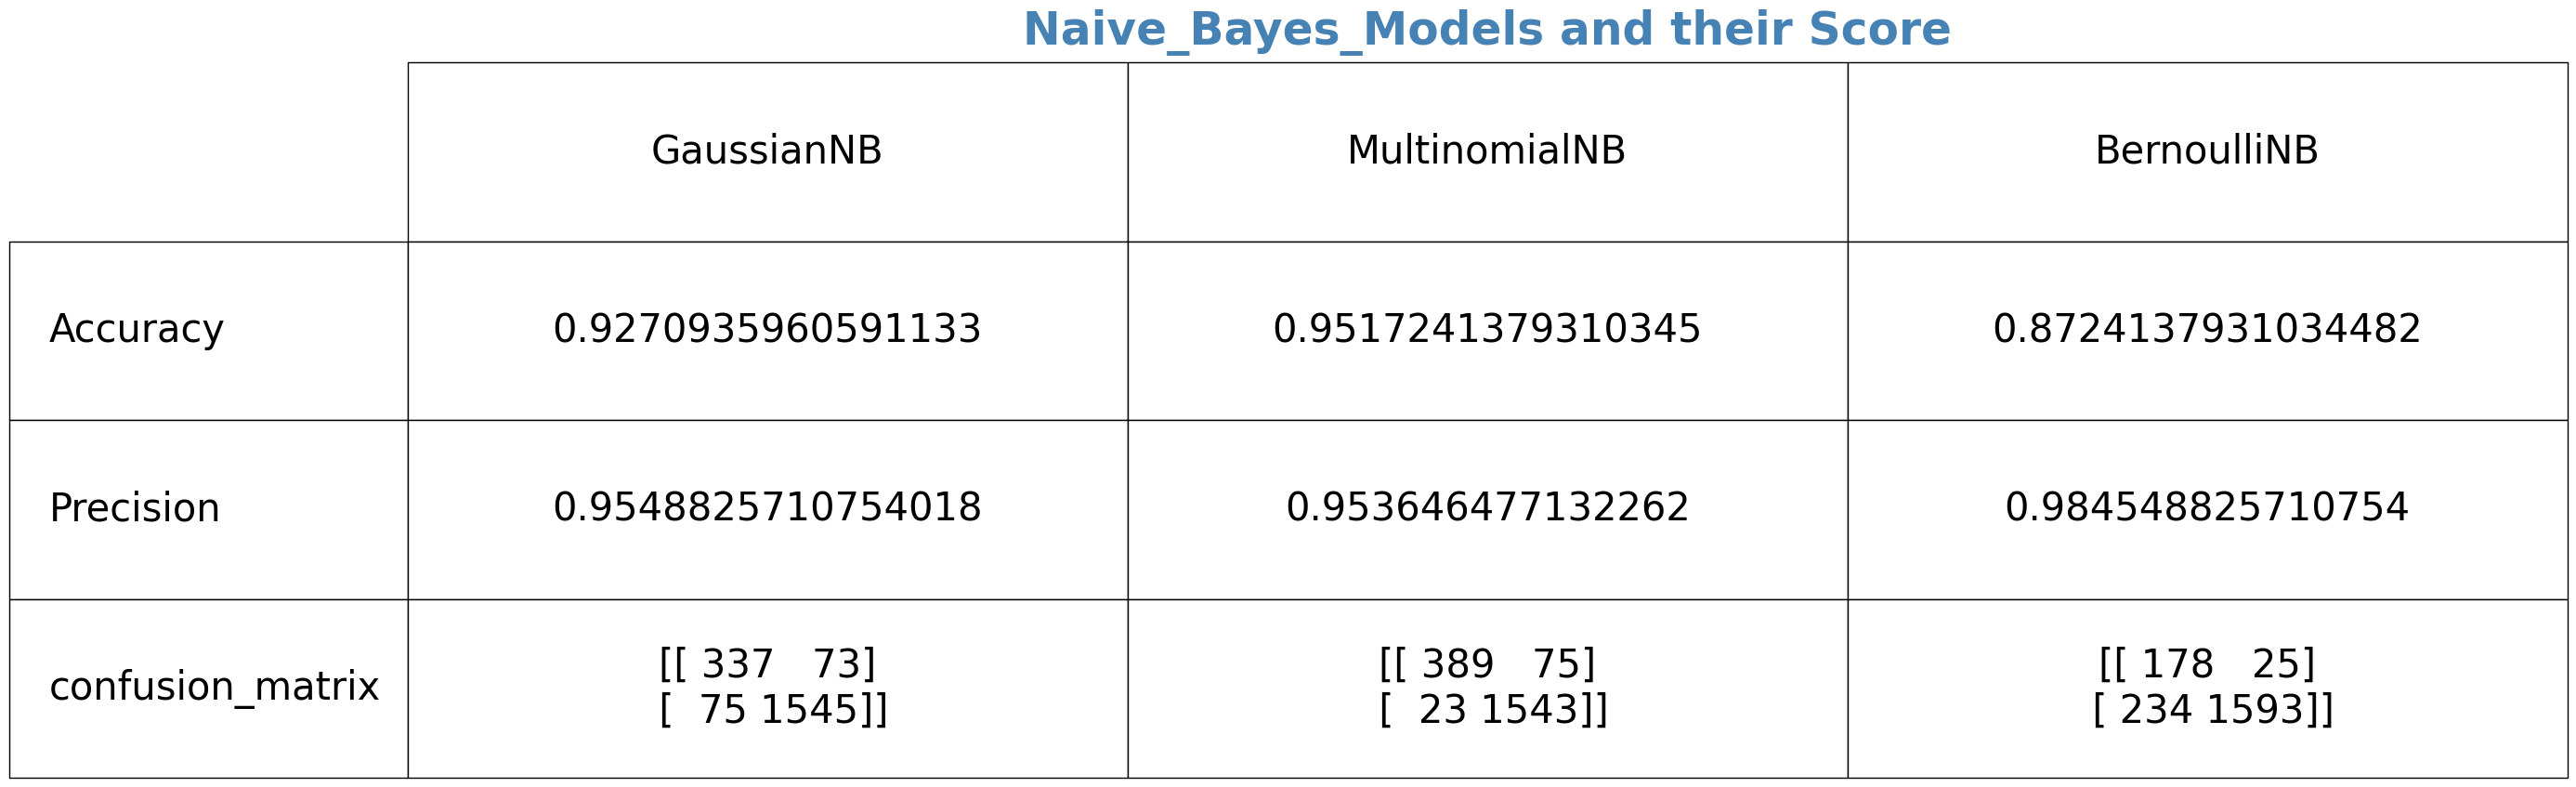

In [141]:
plot_dataframe_title(NB_Models_Score,'Naive_Bayes_Models and their Score',(5,5))

In [196]:
df_melted = NB_Models_Score[:2].melt(id_vars='Metrics', var_name='Algorithm', value_name='Value')

# ploting 
sns.catplot(x='Algorithm', y='Value', hue='Metrics', data=df_melted, kind='bar', height=6, aspect=1.5)

,Metrics,Algorithm,Value
0,Accuracy,GaussianNB,0.93
1,Precision,GaussianNB,0.95
2,Accuracy,MultinomialNB,0.95
3,Precision,MultinomialNB,0.95
4,Accuracy,BernoulliNB,0.87
5,Precision,BernoulliNB,0.98
